In [1]:
import pandas as pd
import subprocess
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Part 1: Prep just training + validation hits for ML predictions

In [2]:
df = pd.read_csv('../data/training_plus_ml_curation_hits.csv')
df

,SMILES,Name,hit_inh,hit_kill
0,CCCC[C@H](CC)CNC(=N)N=C(N)NCCCCCCNC(N)=NC(=N)N...,alexidine,1,1
1,NC(Nc1ccc(Cl)cc1)=NC(=N)NCCCCCCNC(=N)N=C(N)Nc1...,chlorhexidine,1,1
2,CC[C@@H](C)CCCCC(=O)N[C@@H](CCN)C(=O)N[C@@H]([...,polymyxin-B-sulfate,1,1
3,OCCN[C@H]1CCCc2c1[nH]c1ccc(cc21)-c1ccccc1 |&1:...,casin,1,1
4,NC[C@H]1O[C@H](O[C@@H]2[C@@H](N)C[C@@H](N)[C@H...,bekanamycin,1,1
...,...,...,...,...
95,CC(=O)O[Pt+4](C)(C)(Cl)(Cl)OC(=O)C.NC1CCCCC1,BRD-M31395033,0,1
96,CN(C)c1ccc(cc1)[C+](c1ccc(cc1)N(C)C)c1ccc(cc1)...,BRD-K60025295,0,1
97,CN1CCN(CC1)c1c(cc2c3c1OCN(C)N3C=C(C(=O)O)C2=O)F,BRD-K71926323,1,1
98,CC(C)c1ccc(cc1)Cn1ccc2c1ccc1nc(nc(c12)N)NC1CC1,BRD-K17140735,1,1


In [3]:
# use HepG2 model on hit compounds - can use subprocess, the terminal, or whatever you want!   

# activate_command = 'source activate chemprop; '
# run_command = 'python predict.py --test_path ../../nontoxic_stat_phase_killing_abx/training_plus_ml_curation_hits.csv --checkpoint_dir ../../cytotox_models/hepg2/' + ' --preds_path ../../nontoxic_stat_phase_killing_abx/out/hepg2_toxpreds_on_training_plus_ml_curation_hits.csv --features_generator rdkit_2d_normalized --no_features_scaling --smiles_column SMILES'
# full_command = activate_command + run_command
# test = subprocess.run(full_command, cwd="../../chemprop/", shell=True, capture_output=True)
# print(test)

CompletedProcess(args='source activate chemprop; python predict.py --test_path ../../../ian_stat_phase_ML/toxicity_05102022_felixtox/out/train_val_hits.csv --checkpoint_dir ../../../ian_stat_phase_ML/models/felix_cytotox_models/final_tox_hepg2/ --preds_path ../../../ian_stat_phase_ML/toxicity_05102022_felixtox/out/ian_train_hits_hepg2_toxpreds.csv --features_generator rdkit_2d_normalized --no_features_scaling --smiles_column SMILES', returncode=0, stdout=b'Loading training args\nLoading data\nValidating SMILES\nTest size = 100\nPredicting with an ensemble of 20 models\nLoading pretrained parameter "encoder.encoder.0.cached_zero_vector".\nLoading pretrained parameter "encoder.encoder.0.W_i.weight".\nLoading pretrained parameter "encoder.encoder.0.W_h.weight".\nLoading pretrained parameter "encoder.encoder.0.W_o.weight".\nLoading pretrained parameter "encoder.encoder.0.W_o.bias".\nLoading pretrained parameter "ffn.1.weight".\nLoading pretrained parameter "ffn.1.bias".\nLoading pretrained

# Part 2: Read in and process HepG2 model predictions

In [3]:
hepg2df = pd.read_csv('../out/hepg2_toxpreds_on_training_plus_ml_curation_hits.csv')
hepg2df['hepg2'] = hepg2df['TOXICITY']
newdf = hepg2df[['SMILES', 'Name', 'hit_inh', 'hit_kill', 'hepg2']]
newdf

,SMILES,Name,hit_inh,hit_kill,hepg2
0,CCCC[C@H](CC)CNC(=N)N=C(N)NCCCCCCNC(N)=NC(=N)N...,alexidine,1.0,1.0,0.263691
1,NC(Nc1ccc(Cl)cc1)=NC(=N)NCCCCCCNC(=N)N=C(N)Nc1...,chlorhexidine,1.0,1.0,0.684506
2,CC[C@@H](C)CCCCC(=O)N[C@@H](CCN)C(=O)N[C@@H]([...,polymyxin-B-sulfate,1.0,1.0,0.058804
3,OCCN[C@H]1CCCc2c1[nH]c1ccc(cc21)-c1ccccc1 |&1:...,casin,1.0,1.0,0.416008
4,NC[C@H]1O[C@H](O[C@@H]2[C@@H](N)C[C@@H](N)[C@H...,bekanamycin,1.0,1.0,0.026443
...,...,...,...,...,...
95,CC(=O)O[Pt+4](C)(C)(Cl)(Cl)OC(=O)C.NC1CCCCC1,BRD-M31395033,0.0,1.0,0.177704
96,CN(C)c1ccc(cc1)[C+](c1ccc(cc1)N(C)C)c1ccc(cc1)...,BRD-K60025295,0.0,1.0,0.690095
97,CN1CCN(CC1)c1c(cc2c3c1OCN(C)N3C=C(C(=O)O)C2=O)F,BRD-K71926323,1.0,1.0,0.037562
98,CC(C)c1ccc(cc1)Cn1ccc2c1ccc1nc(nc(c12)N)NC1CC1,BRD-K17140735,1.0,1.0,0.588827


In [4]:
classes = []
preds = []
toxs = []
for i, row in newdf.iterrows():
    classes.append(row['hit_inh'])
    preds.append(row['hepg2'])
    toxs.append('hepg2')

df = pd.DataFrame()
df['Class'] = classes
df['Value'] = preds
df['Toxicity Model'] = toxs
df

,Class,Value,Toxicity Model
0,1.0,0.263691,hepg2
1,1.0,0.684506,hepg2
2,1.0,0.058804,hepg2
3,1.0,0.416008,hepg2
4,1.0,0.026443,hepg2
...,...,...,...
95,0.0,0.177704,hepg2
96,0.0,0.690095,hepg2
97,1.0,0.037562,hepg2
98,1.0,0.588827,hepg2


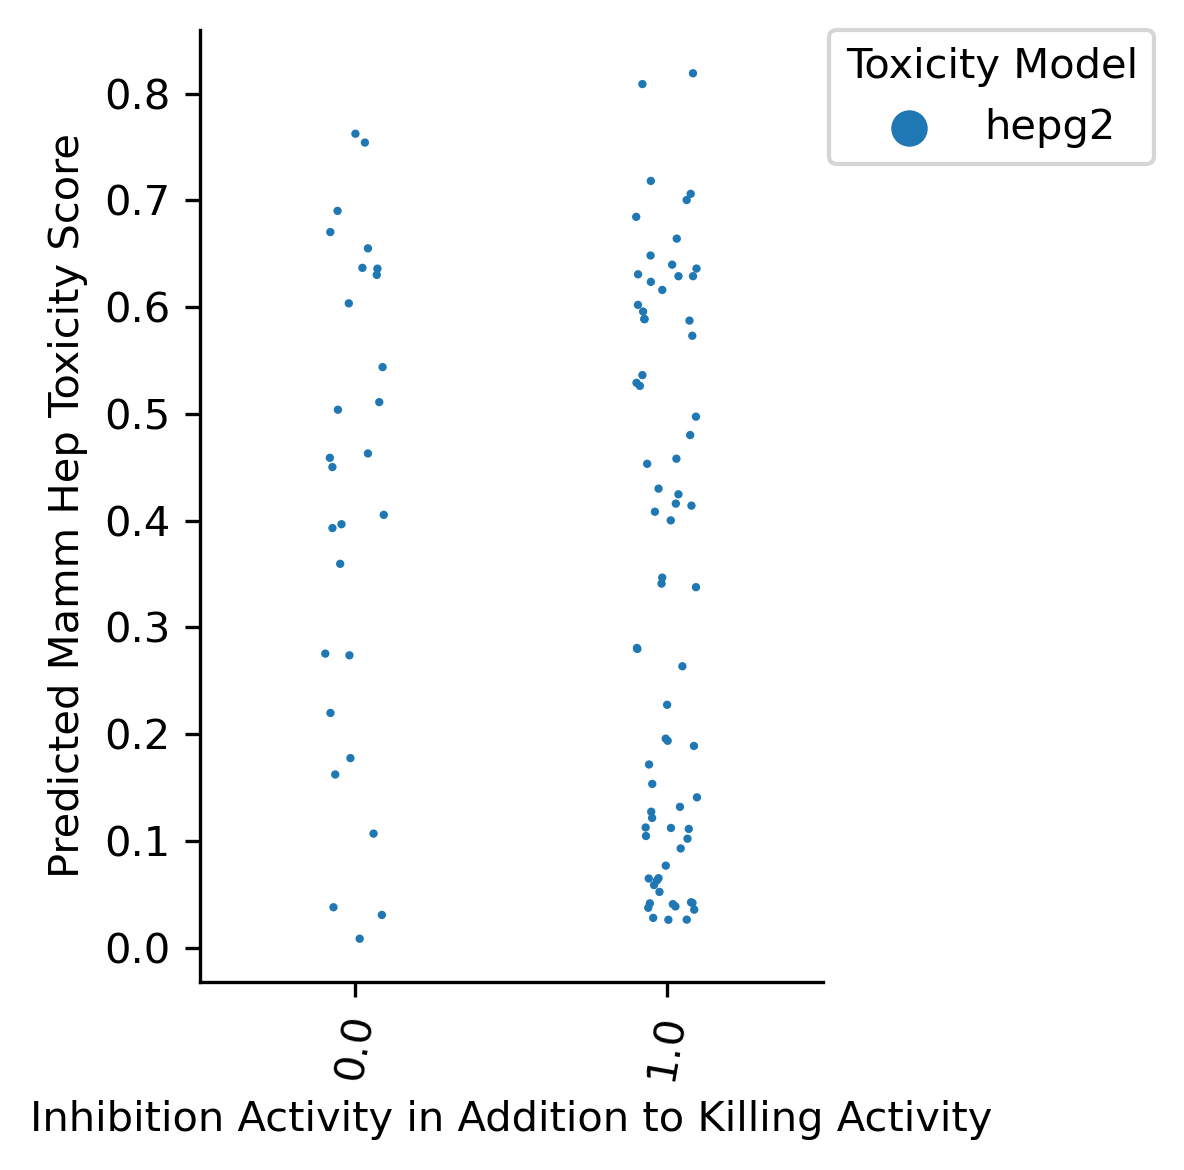

In [7]:
plt.figure(figsize=(4,4), dpi=300)
#my_pal = dict(zip(labels, ["darkgreen","green", 'mediumseagreen', 'darkorange', 'goldenrod', 'sandybrown']))
ax = sns.stripplot(data=df, x = 'Class', y = 'Value', hue = 'Toxicity Model', dodge = True, edgecolor='black', linewidth = 0, s = 2, label='') #, palette = my_pal)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:1], labels[:1], title='Toxicity Model', bbox_to_anchor=(1.01, 1), borderaxespad=0)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel('Inhibition Activity in Addition to Killing Activity')
plt.xticks(rotation = 80)
plt.ylabel('Predicted Mamm Hep Toxicity Score')
plt.tight_layout()

plt.show()

In [8]:
thresh = [0.2]
for t in thresh:
    fails_thresh = []
    for i, row in newdf.iterrows():
        fails_any = (float(row['hepg2']) > t)
        fails_thresh.append(fails_any)

    newdf['fails_any_hepg2_tox_at_' + str(t)] = fails_thresh
newdf                                                        

,SMILES,Name,hit_inh,hit_kill,hepg2,fails_any_hepg2_tox_at_0.2
0,CCCC[C@H](CC)CNC(=N)N=C(N)NCCCCCCNC(N)=NC(=N)N...,alexidine,1.0,1.0,0.263691,True
1,NC(Nc1ccc(Cl)cc1)=NC(=N)NCCCCCCNC(=N)N=C(N)Nc1...,chlorhexidine,1.0,1.0,0.684506,True
2,CC[C@@H](C)CCCCC(=O)N[C@@H](CCN)C(=O)N[C@@H]([...,polymyxin-B-sulfate,1.0,1.0,0.058804,False
3,OCCN[C@H]1CCCc2c1[nH]c1ccc(cc21)-c1ccccc1 |&1:...,casin,1.0,1.0,0.416008,True
4,NC[C@H]1O[C@H](O[C@@H]2[C@@H](N)C[C@@H](N)[C@H...,bekanamycin,1.0,1.0,0.026443,False
...,...,...,...,...,...,...
95,CC(=O)O[Pt+4](C)(C)(Cl)(Cl)OC(=O)C.NC1CCCCC1,BRD-M31395033,0.0,1.0,0.177704,False
96,CN(C)c1ccc(cc1)[C+](c1ccc(cc1)N(C)C)c1ccc(cc1)...,BRD-K60025295,0.0,1.0,0.690095,True
97,CN1CCN(CC1)c1c(cc2c3c1OCN(C)N3C=C(C(=O)O)C2=O)F,BRD-K71926323,1.0,1.0,0.037562,False
98,CC(C)c1ccc(cc1)Cn1ccc2c1ccc1nc(nc(c12)N)NC1CC1,BRD-K17140735,1.0,1.0,0.588827,True


In [9]:
columns = ['Class']

sum_fails = pd.DataFrame(columns = columns)
t = 0.2

for i, group in newdf.groupby('hit_inh'):
    currdf = pd.DataFrame(columns = columns)
    currdf['Class'] = [i] # where class is inhibition activity in addition to killing activity
    currdf['Fails HepG2 Tox at >' + str(t)] = [str(sum(group['fails_any_hepg2_tox_at_' + str(t)])) + ' / ' + str(len(group))]
    sum_fails = sum_fails.append(currdf) 
sum_fails    

/var/folders/py/8hwb28r933z4xh4q0dw5hz2h0000gn/T/ipykernel_83893/2033747345.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sum_fails = sum_fails.append(currdf)
/var/folders/py/8hwb28r933z4xh4q0dw5hz2h0000gn/T/ipykernel_83893/2033747345.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sum_fails = sum_fails.append(currdf)


,Class,Fails HepG2 Tox at >0.2
0,0.0,22 / 28
0,1.0,41 / 72
